In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Importing crime csv  

crime_data = pd.read_csv('seattle_prop_crime_rate.csv')
crime_data

,zipcode,prop_crime_rate_per_1k
0,98101,268.746275
1,98102,61.509086
2,98103,62.774477
3,98104,185.596456
4,98105,57.196131
5,98106,51.997918
6,98107,66.512043
7,98108,69.767235
8,98109,87.699296
9,98112,47.076027


In [4]:
# Importing house data csv  

kc_house_data = pd.read_csv('kc_house_data.csv')
kc_house_data.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
kc_house_data["zipcode"].unique

<bound method Series.unique of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64>

In [6]:
merged_df = pd.merge(kc_house_data, crime_data, on='zipcode', how='inner')

In [7]:
merged_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,prop_crime_rate_per_1k
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.565414
1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,880,0,1945,0,98178,47.5009,-122.248,1190,6780,12.565414
2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,12.565414
3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,12.565414
4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,860,0,1931,0,98178,47.5048,-122.272,1650,8775,12.565414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,2895800590,20141020T000000,359800.0,5,2.50,2170,2752,2.0,0,0,...,2170,0,2014,0,98106,47.5167,-122.347,1800,2752,51.997918
8246,3438503021,20141105T000000,443000.0,3,2.50,2430,7049,2.0,0,0,...,2430,0,2007,0,98106,47.5399,-122.352,1770,7049,51.997918
8247,880000205,20140729T000000,249000.0,3,2.00,1260,1125,2.0,0,0,...,810,450,2011,0,98106,47.5262,-122.361,1260,1172,51.997918
8248,3438501329,20140520T000000,305000.0,2,2.50,1590,2656,2.0,0,0,...,1220,370,2009,0,98106,47.5489,-122.364,1590,2306,51.997918


In [8]:
merged_df.to_csv("merged_df.csv", index=False)

In [9]:
cleaned_house_data = merged_df.drop(['id', 'date'], axis=1)
cleaned_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,prop_crime_rate_per_1k
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.565414
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780,12.565414
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,12.565414
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,12.565414
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775,12.565414


In [11]:
new_merge_df = cleaned_house_data.dropna()
new_merge_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,prop_crime_rate_per_1k
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.565414
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780,12.565414
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,12.565414
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,12.565414
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775,12.565414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,359800.0,5,2.50,2170,2752,2.0,0,0,3,8,2170,0,2014,0,98106,47.5167,-122.347,1800,2752,51.997918
8246,443000.0,3,2.50,2430,7049,2.0,0,0,3,8,2430,0,2007,0,98106,47.5399,-122.352,1770,7049,51.997918
8247,249000.0,3,2.00,1260,1125,2.0,0,0,3,7,810,450,2011,0,98106,47.5262,-122.361,1260,1172,51.997918
8248,305000.0,2,2.50,1590,2656,2.0,0,0,3,7,1220,370,2009,0,98106,47.5489,-122.364,1590,2306,51.997918


In [12]:
# Create our features
X = new_merge_df.drop(columns='price')
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = new_merge_df['price']

In [13]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.15069549 -1.13357488 -0.76457606 -0.07895583 -0.80512464 -0.07649988
  -0.34369142 -0.62076187 -0.34763304 -0.41568925 -0.83383009  0.02250559
  -0.25882343  1.9451431  -1.45456173  1.8158814  -0.67355891 -0.03717551
  -1.43838127]
 [-1.10191034 -1.13357488 -1.14078044  0.16340441 -0.80512464 -0.07649988
  -0.34369142  0.79513125 -1.33319062 -0.90875282 -0.83383009 -0.28092823
  -0.25882343  1.9451431  -1.58087673  2.0299626  -0.97345848  0.25953205
  -1.43838127]
 [-0.15069549  0.44418143  0.38911739  0.46817777 -0.80512464 -0.07649988
   2.05516999 -0.62076187  0.63792454  0.30747066  0.28797616  0.38662618
  -0.25882343  1.9451431  -1.48031527  2.1251098   1.96555726  0.7668232
  -1.43838127]
 [-0.15069549 -1.13357488 -0.6140943  -0.02576527 -0.80512464 -0.07649988
  -0.34369142 -0.62076187 -0.34763304 -0.21846382 -0.83383009  0.20456589
  -0.25882343  1.9451431  -1.52691692  1.863455   -0.71354552  0.47983084
  -1.43838127]
 [-1.10191034 -1.13357488 -1.16586073 -0.1615299  -0.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
model.score(X_train, y_train)

0.7488390968894882

In [19]:
model.score(X_test, y_test)

0.7465962864124807

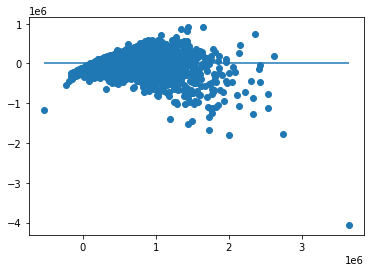

In [20]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [29]:
new_data = new_merge_df.drop(["sqft_lot", "floors", "condition", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat","long", "sqft_above", "sqft_living15", "sqft_lot15", "waterfront", "view"], axis=1)
new_data

,price,bedrooms,bathrooms,sqft_living,grade,prop_crime_rate_per_1k
0,221900.0,3,1.00,1180,7,12.565414
1,205425.0,2,1.00,880,6,12.565414
2,445000.0,3,2.25,2100,8,12.565414
3,236000.0,3,1.00,1300,7,12.565414
4,170000.0,2,1.00,860,6,12.565414
...,...,...,...,...,...,...
8245,359800.0,5,2.50,2170,8,51.997918
8246,443000.0,3,2.50,2430,8,51.997918
8247,249000.0,3,2.00,1260,7,51.997918
8248,305000.0,2,2.50,1590,7,51.997918


In [30]:
# Create our features
X = new_data.drop(columns='price')
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = new_data['price']

In [31]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.15069549 -1.13357488 -0.76457606 -0.34763304 -1.43838127]
 [-1.10191034 -1.13357488 -1.14078044 -1.33319062 -1.43838127]
 [-0.15069549  0.44418143  0.38911739  0.63792454 -1.43838127]
 [-0.15069549 -1.13357488 -0.6140943  -0.34763304 -1.43838127]
 [-1.10191034 -1.13357488 -1.16586073 -1.33319062 -1.43838127]]


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.score(X_train, y_train)

0.6535031178059385

In [35]:
model.score(X_test, y_test)

0.6362568660791885

In [ ]:
new_data.to_csv("new_data.csv", index=False)